In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Read in pickled data frames

import pickle

pickle_in = open("train.pickle", "rb") # read file as bytes
train = pickle.load(pickle_in)

X = train.drop(columns=['unit_number', 'maxcycles', 'RUL', '20_cycles_to_failure'], axis=1)
y = train['20_cycles_to_failure']
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20631 entries, 0 to 20630
Data columns (total 17 columns):
cycles                   20631 non-null int64
operational_setting_1    20631 non-null float64
operational_setting_2    20631 non-null float64
sensor_measurement_2     20631 non-null float64
sensor_measurement_3     20631 non-null float64
sensor_measurement_4     20631 non-null float64
sensor_measurement_7     20631 non-null float64
sensor_measurement_8     20631 non-null float64
sensor_measurement_9     20631 non-null float64
sensor_measurement_11    20631 non-null float64
sensor_measurement_12    20631 non-null float64
sensor_measurement_13    20631 non-null float64
sensor_measurement_14    20631 non-null float64
sensor_measurement_15    20631 non-null float64
sensor_measurement_17    20631 non-null int64
sensor_measurement_20    20631 non-null float64
sensor_measurement_21    20631 non-null float64
dtypes: float64(15), int64(2)
memory usage: 2.8 MB


In [28]:
# Let's analyze the data and visualize with PCA for both SVC and GBC Classifiers

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca.fit(X_scaled)
X_transform = pca.transform(X_scaled)

svc_cvs = cross_val_score(SVC(kernel='rbf', C=6, gamma=0.1, random_state=42), X_transform, y, cv=5, scoring='f1')
print(svc_cvs.mean())

gbc_cvs = cross_val_score(GradientBoostingClassifier(learning_rate=0.1, max_depth=4, random_state=42), X_transform, 
                          y, cv=5, scoring='f1')
print(gbc_cvs.mean())  # It appears the SVC classifier performs slightly better with a higher mean F1 score

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.8565562249085934
0.845985181177643


In [29]:
from itertools import cycle

def PCA_plot(data, target, target_names):
    colors = cycle(['blue','red'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(7,5))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='white', alpha=0.2)
    plt.legend()

[0.55785606 0.12749143]


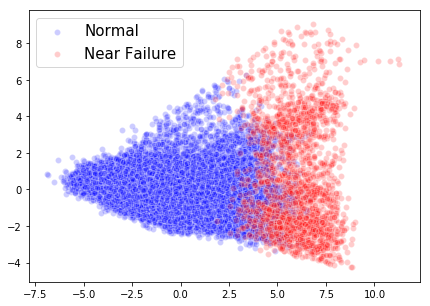

<Figure size 720x720 with 0 Axes>

In [30]:
# Plot out principal components

print(pca.explained_variance_ratio_) # Nearly 70% of variance is explained by two components!

PCA_plot(X_transform, target=y, target_names=['Normal', 'Near Failure'])
plt.legend(fontsize=15)
plt.figure(figsize=[10,10]);

In [31]:
# Feature importance from PCA

pca_df = pd.DataFrame(pca.components_, index = ['PC1','PC2'])

feat_imp = list(zip(X.columns, pca_df.iloc[0, :].values))
feat_imp

[('cycles', 0.23348367397135078),
 ('operational_setting_1', 0.0020720826615752974),
 ('operational_setting_2', 0.005140242689818707),
 ('sensor_measurement_2', 0.2656256159551329),
 ('sensor_measurement_3', 0.2535523277228707),
 ('sensor_measurement_4', 0.29316507144295445),
 ('sensor_measurement_7', -0.2897317768643547),
 ('sensor_measurement_8', 0.270918653421846),
 ('sensor_measurement_9', 0.11014779789144014),
 ('sensor_measurement_11', 0.30080584576180835),
 ('sensor_measurement_12', -0.29564476237808973),
 ('sensor_measurement_13', 0.2706055073043723),
 ('sensor_measurement_14', 0.07200898867535926),
 ('sensor_measurement_15', 0.2792869058777467),
 ('sensor_measurement_17', 0.2624904307645583),
 ('sensor_measurement_20', -0.2751881999249884),
 ('sensor_measurement_21', -0.2761442141626565)]